![Image in a markdown cell](https://cursos.utnba.centrodeelearning.com/pluginfile.php/1/theme_space/customlogo/1738330016/Logo%20UTN%20Horizontal.png)

# **Regresión Lineal**: Ejemplo Práctico

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

## Generación de Datos Sintéticos

In [ ]:
# Datos que siguen la línea y = 3x + 4, con ruido.
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
n_muestras = len(X)

## Visualización de Datos

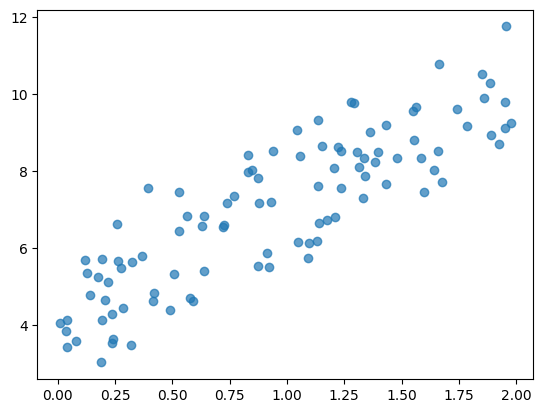

In [ ]:
plt.scatter(X, y, alpha=0.7, label='Datos Originales')
plt.show()

## Inicialización de Parámetros del Modelo e Hiperparámetros

In [ ]:
# Hiperparámetros
tasa_aprendizaje = 0.1
n_iteraciones = 100

# Inicialización de parámetros
m = -1.0
b = 8.0

## Evaluación de Función de Costo para Visualización

In [ ]:
m_vals = np.linspace(-2, 8, 50)
b_vals = np.linspace(-2, 8, 50)
M, B = np.meshgrid(m_vals, b_vals)

# Función para calcular el costo para cualquier par (m, b)
def calcular_costo(m, b, X, y):
    y_pred = m * X + b
    costo = np.sum((y_pred - y)**2) / n_muestras
    return costo

# Creamos una malla de valores para m y b para poder graficar la superficie 3D
# El rango de valores debe incluir el valor óptimo (m=3, b=4)
# Calculamos el costo para cada punto en nuestra malla
costos = np.zeros(M.shape)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        costos[i, j] = calcular_costo(M[i, j], B[i, j], X, y)

## Iniciación de Descenso de Gradiente

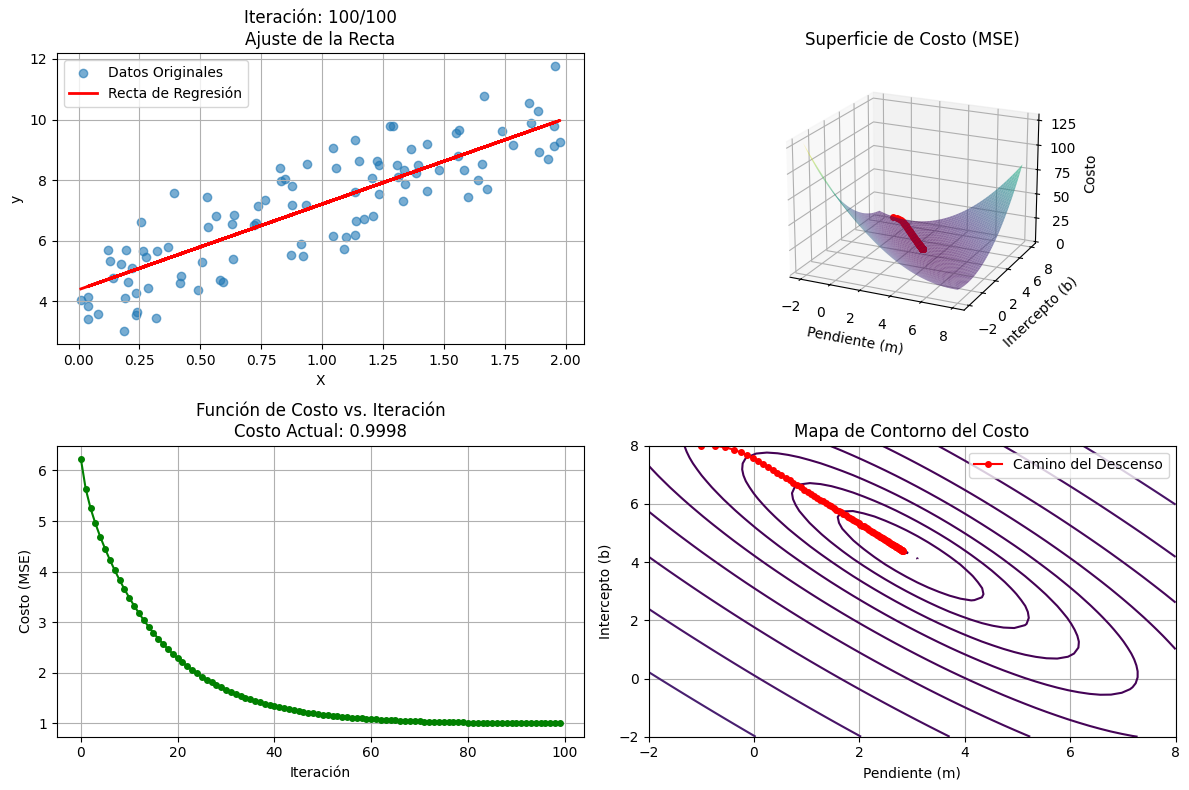


¡Descenso de Gradiente completado!
Resultado final: m = 2.8310, b = 4.3771
Costo final: 0.9998


In [ ]:
# Listas para guardar el historial para la visualización
historial_costo = []
historial_m = []
historial_b = []

print("Iniciando el Descenso de Gradiente con visualización 3D...")
time.sleep(2)

for i in range(n_iteraciones):
    # A. Calcular la predicción del modelo
    y_pred = m * X + b

    # B. Calcular el costo y guardarlo en el historial
    costo = (1/n_muestras) * np.sum((y_pred - y)**2)
    historial_costo.append(costo)
    historial_m.append(m)
    historial_b.append(b)

    # C. Calcular los gradientes
    grad_m = (2/n_muestras) * np.sum(X * (y_pred - y))
    grad_b = (2/n_muestras) * np.sum(y_pred - y)

    # D. Actualizar los parámetros m y b
    m = m - tasa_aprendizaje * grad_m
    b = b - tasa_aprendizaje * grad_b

    # E. Visualización en cada iteración
    clear_output(wait=True)

    # Crear una figura con 4 subplots (2x2)
    fig = plt.figure(figsize=(12, 8))

    # --- Gráfico 1: Ajuste de la recta de regresión ---
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.scatter(X, y, alpha=0.6, label='Datos Originales')
    ax1.plot(X, y_pred, color='red', linewidth=2, label='Recta de Regresión')
    ax1.set_title(f'Iteración: {i+1}/{n_iteraciones}\nAjuste de la Recta')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)

    # --- Gráfico 2: Superficie de Costo en 3D ---
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax2.plot_surface(M, B, costos, cmap='viridis', alpha=0.6, edgecolor='none')
    # Trazar el camino del descenso
    ax2.plot(historial_m, historial_b, historial_costo, color='red', marker='o', markersize=4, label='Camino del Descenso')
    ax2.set_title('Superficie de Costo (MSE)')
    ax2.set_xlabel('Pendiente (m)')
    ax2.set_ylabel('Intercepto (b)')
    ax2.set_zlabel('Costo')
    ax2.view_init(elev=20, azim=-65) # Ajustar el ángulo de visión

    # --- Gráfico 3: Evolución de la Función de Costo (2D) ---
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(range(i+1), historial_costo, color='green', marker='o', markersize=4)
    ax3.set_title(f'Función de Costo vs. Iteración\nCosto Actual: {costo:.4f}')
    ax3.set_xlabel('Iteración')
    ax3.set_ylabel('Costo (MSE)')
    ax3.grid(True)

    # --- Gráfico 4: Mapa de Contorno del Costo ---
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.contour(M, B, costos, levels=np.logspace(0, 3, 15), cmap='viridis')
    # Trazar el camino del descenso en 2D
    ax4.plot(historial_m, historial_b, 'r-o', markersize=4, label='Camino del Descenso')
    ax4.set_title('Mapa de Contorno del Costo')
    ax4.set_xlabel('Pendiente (m)')
    ax4.set_ylabel('Intercepto (b)')
    ax4.grid(True)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    time.sleep(0.2)

print("\n¡Descenso de Gradiente completado!")
print(f"Resultado final: m = {m:.4f}, b = {b:.4f}")
print(f"Costo final: {costo:.4f}")